In [1]:
# Import pandas, numpy and matplotlib libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

# Convert csv into dataframes. Note that original categorical data has space in front of the value, this is
# eliminated with an extra parameter.
df = pd.read_csv('Bank_Customer_Churn_Modelling.csv',  keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)

# Prepare and explore data

In [2]:
# Print (rows, columns) to see how many rows and columns my CSV has
df.shape

(10000, 14)

We have 10.000 customers (10.000 rows) with 14 features (14 columns) associated with each customer.

In [3]:
# Print the first 5 rows, just to see what I am working with
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Print the last 5 rows, just to see what I am working with
df.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Convert the features to their appropriate data types (continuous or categorical types)

In [5]:
# Check the data types so I can convert the features to their appropriate data types
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
# See how many unique values the feature Geography has in order to see if it is categorical or continuous
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
# Find the maximum values of some of the int64 features that could possible be changed to categorical
df[['CreditScore', 'Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']].max()

CreditScore        850
Gender            Male
Age                 92
Tenure              10
NumOfProducts        4
HasCrCard            1
IsActiveMember       1
Exited               1
dtype: object

In [8]:
# Find the minimum values of some of the int64 features
df[['CreditScore', 'Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']].min()

CreditScore          350
Gender            Female
Age                   18
Tenure                 0
NumOfProducts          1
HasCrCard              0
IsActiveMember         0
Exited                 0
dtype: object

Based on examining the data in a spreadsheet program, the following decision were made about the data convertions:
- **object** values (except for *Surname*) were converted to **categorical** as they contained finite set of possible values.
- the columns *'Tenure'*, *'NumOfProducts'*, *'HasCrCard'*, *'IsActiveMember'* and *'Exited'*, which are all **int64**, will be converted to **categorical** because it contained finite set of possible values.

In [9]:
# Select columns containing categorical data
categorical_columns = df[['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']].columns

# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')

df.dtypes

RowNumber             int64
CustomerId            int64
Surname              object
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure             category
Balance             float64
NumOfProducts      category
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited             category
dtype: object

In [10]:
# Print table with descriptive statistics for all the categorical features
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457
Tenure,10000,11,2,1048
NumOfProducts,10000,4,1,5084
HasCrCard,10000,2,1,7055
IsActiveMember,10000,2,1,5151
Exited,10000,2,0,7963


### Drop duplicate rows and columns, if any 

In [11]:
# Checking for duplicated rows
print(df['CustomerId'].index.get_duplicates())


Int64Index([], dtype='int64')


C:\Users\Brynja\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'get_duplicates' is deprecated and will be removed in a future release. You can use idx[idx.duplicated()].unique() instead
  


In [12]:
# Checking for duplicated columns
print(df.set_index('CustomerId').index.T.get_duplicates())

C:\Users\Brynja\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'get_duplicates' is deprecated and will be removed in a future release. You can use idx[idx.duplicated()].unique() instead
  


Int64Index([], dtype='int64', name='CustomerId')


In [13]:
# another way to check for duplicate rows
print('Duplicate rows:', df.duplicated()[df.duplicated() == True].shape[0])
# Check for duplicate columns
print('Duplicate columns:',df.columns.size - df.columns.unique().size)

Duplicate rows: 0
Duplicate columns: 0


The *'RowNumber'* and *'CustomerId'* columns are the only column which are not permitted to have duplicate values. All the other columns can have duplicate values because of the nature of what the columns describe. There are no duplicate rows in my dataset.

The dataset does not contain any duplicate columns.

In [14]:
# Select columns containing continuous data (every float64 and int64 that are not categorical features)
continuous_columns = df[['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary']].columns

In [15]:
# Print table
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [16]:
# Save the cleaned dataframe to a csv file
df.to_csv('CustomerChurn.csv', index=False)

### Descriptive statistics

In [17]:
# Print table with descriptive statistics for all the continuous features
df.select_dtypes(['float64', 'int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [18]:
# Print table with descriptive statistics for all the categorical features
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457
Tenure,10000,11,2,1048
NumOfProducts,10000,4,1,5084
HasCrCard,10000,2,1,7055
IsActiveMember,10000,2,1,5151
Exited,10000,2,0,7963


In [19]:
# Print unique values for categorical features
print("Unique values for:\n- Geography:", pd.unique(df.Geography.ravel()))
print("- Gender:", pd.unique(df.Gender.ravel()))
print("- Tenure:", pd.unique(df.Tenure.ravel()))
print("- NumOfProducts:", pd.unique(df.NumOfProducts.ravel()))
print("- HasCrCard:", pd.unique(df.HasCrCard.ravel()))
print("- IsActiveMember:", pd.unique(df.IsActiveMember.ravel()))
print("- Exited:", pd.unique(df.Exited.ravel()))

Unique values for:
- Geography: ['France' 'Spain' 'Germany']
- Gender: ['Female' 'Male']
- Tenure: [ 2  1  8  7  4  6  3 10  5  9  0]
- NumOfProducts: [1 3 2 4]
- HasCrCard: [1 0]
- IsActiveMember: [1 0]
- Exited: [1 0]


C:\Users\Brynja\Anaconda3.1\lib\site-packages\pandas\core\series.py:628: FutureWarning: Categorical.ravel will return a Categorical object instead of an ndarray in a future version.
  return self._values.ravel(order=order)


### Plot histograms for all the continuous features.

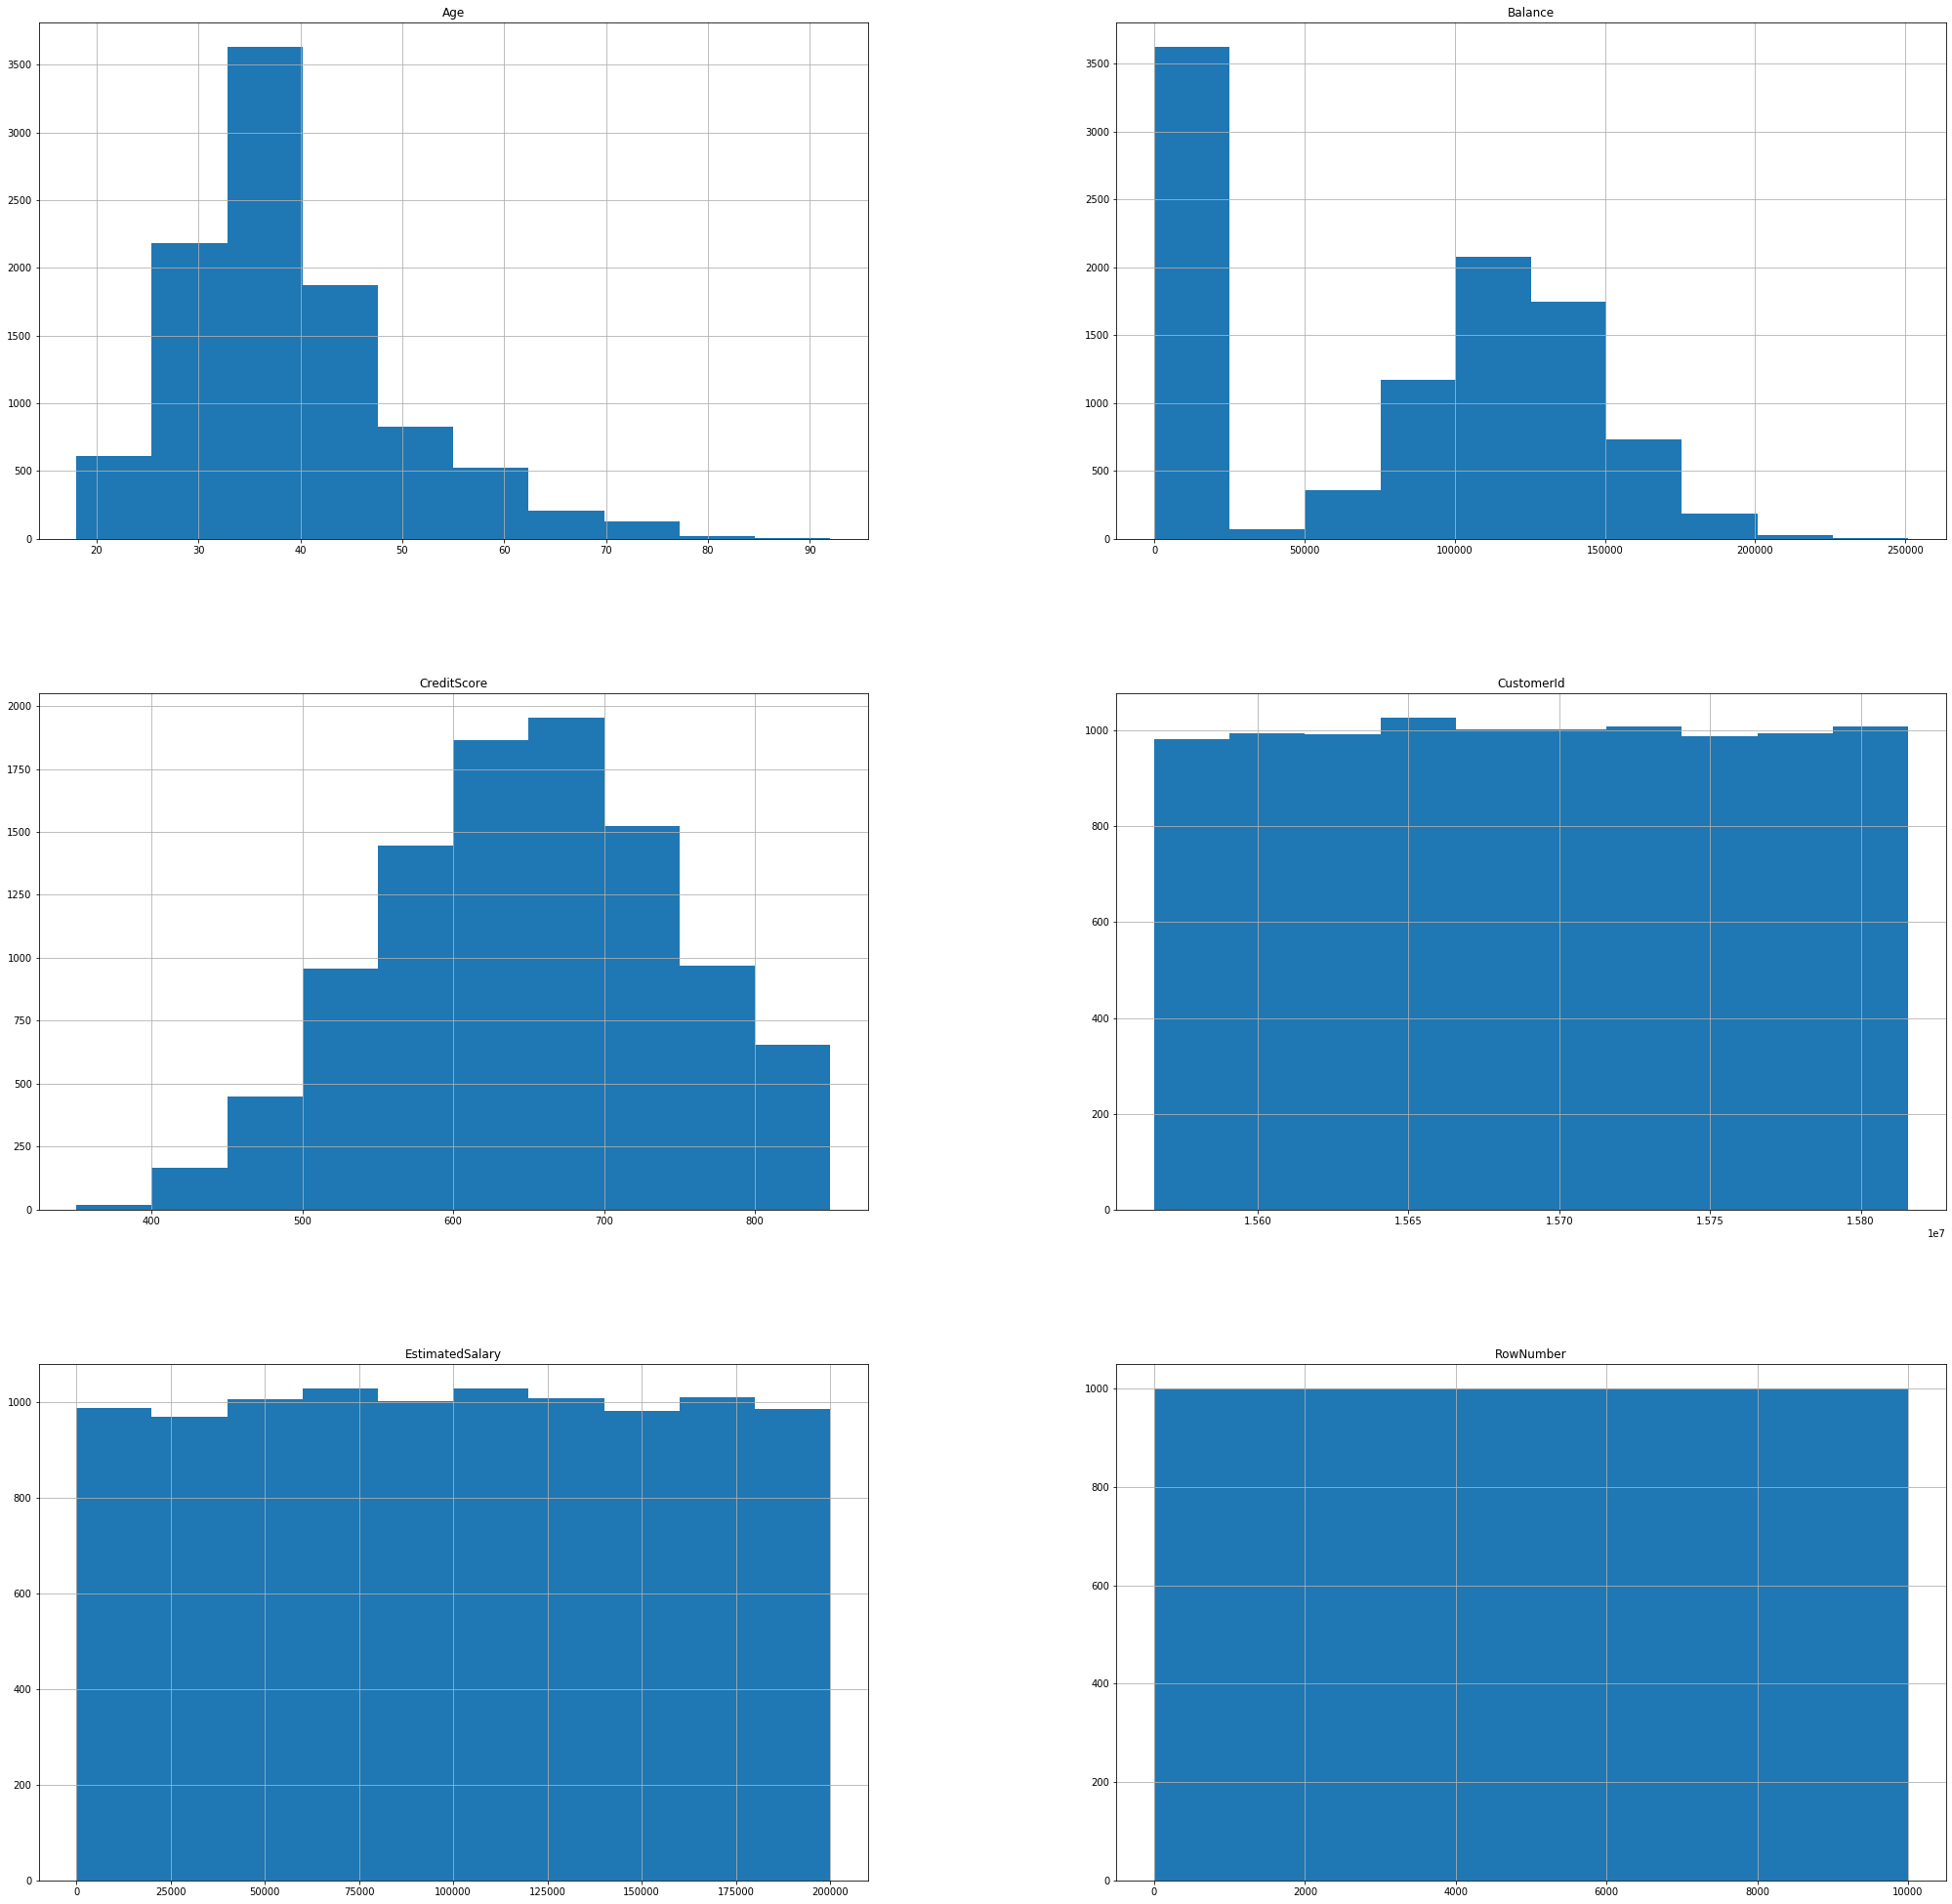

In [20]:
# Plot a histogram of the continuous features (and save in a png file)
df[continuous_columns].hist(figsize=(35,35))
plt.savefig('continuous_histograms.pdf')

In [21]:
# Get number of unique values for EstimatedSalary, since the EstimatedSalary histogram seems very constant
len(df.EstimatedSalary.unique())

9999

### Plot box plots for all the continuous features.

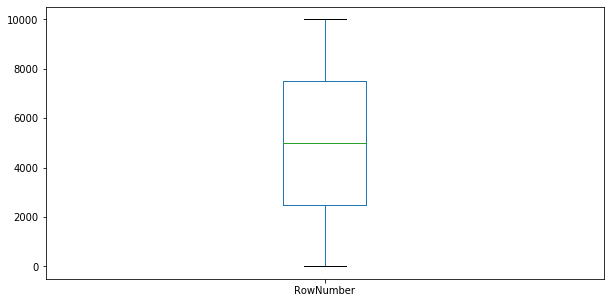

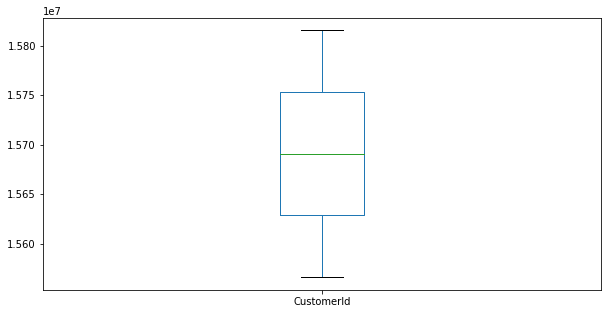

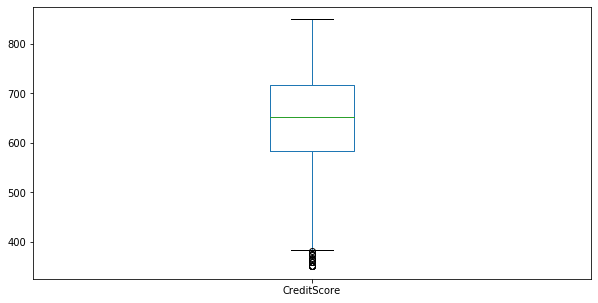

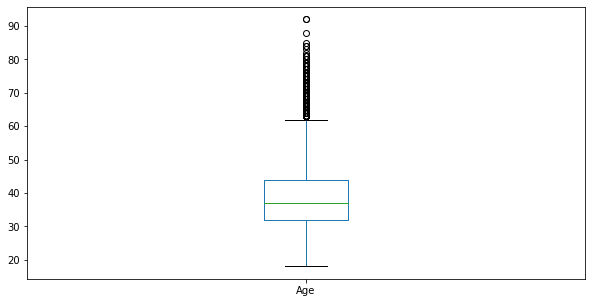

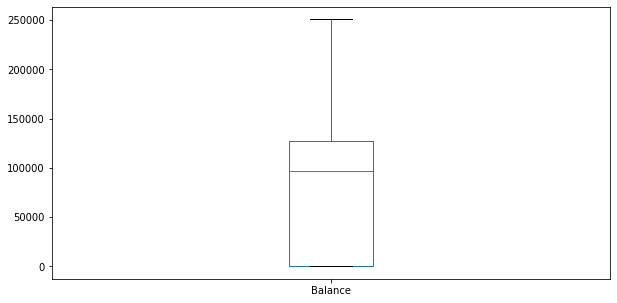

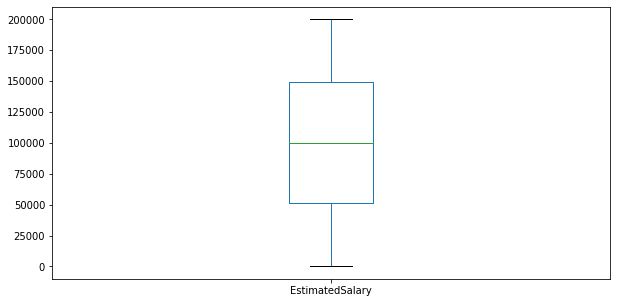

In [22]:
# Plot box plots for all the continuous features and save in a PDF file
pp = PdfPages('continuous_boxplots.pdf')

for col in continuous_columns:
    f = df[col].plot(kind='box', figsize=(10,5))
    pp.savefig(f.get_figure())
    plt.show()

pp.close()

### Plot bar plots for all the categorical features

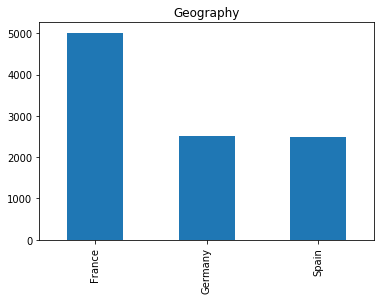

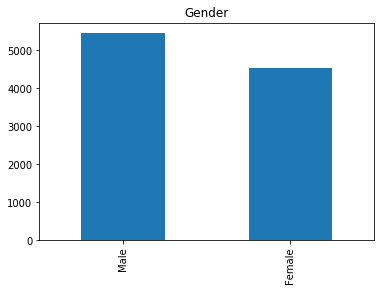

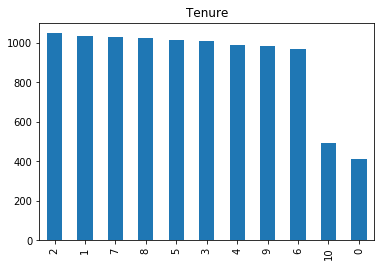

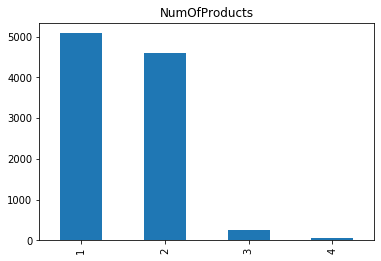

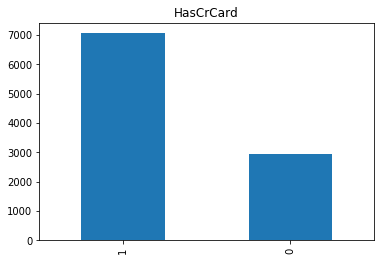

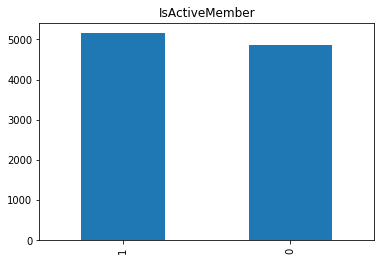

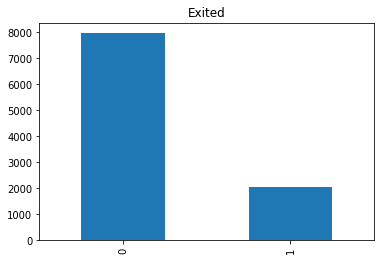

In [23]:
# Plot bar charts for all categorical features and save them in a single PDF file
pp = PdfPages('categorical_barcharts.pdf')

for column in categorical_columns:
    f = df[column].value_counts().plot(kind='bar', title=column, figsize=(6,4))
    pp.savefig(f.get_figure())
    plt.show()

pp.close()

### My initial findings

#### Continuous features
- If we look at the continuous features there is only one feature, *Balance*, that has a lot of zero values, as high as 25% of data. Max value is 250,898.09 with mean of 76,485.89 Thus it appears the data is covering a wide range of customers in terms of balance.
- The *Age* feature seems to have a reasonable range of values, although the distribution tells us that most customers are what we can call young - 75% of customers are 44 years old or younger.
- It appears that the data is covering a wide range of custors in terms of salary. The *EstematedSalary* feature has a min value of 11.58 euros and max value of 199,992.48 euros, with the mean of 100,090.02 euros.
- The *CreditScore* feature has the min value of 350 and max value of 850, with 50% of customers having credit score of 652 or lower. According to www.thebalance.com, credit scores range from 300 to 850, so it seems the data is covering most of the credit score range. The higher the credit score, the better the credit. According to this it seems that 50% of the customers have bad to very bad credit.
    * Above 750: excellent credit
    * 700–750: good credit
    * 650–700: fair credit
    * 600–650: bad credit
    * Below 600: very bad credit
- The other continuous features, *RowNumber* and *CustomerId*, seem to be normal with no duplicate numbers.

#### Categorical features
- It seems that there are no missing values for the categorical features, since they all have the same count of 10,000.
- The *Geography* feature has three unique values - France, Spain and Germany - where about 50% of the customers (5014) are living in France.
- According to the *Gender* feature the customers are about 55% (5457) male and about 45% (4543) female.
- The *Tenure* features has 11 unique vales which tell us how many years a customer has been with the bank. The top value for a customer staying at the bank is 2 years, which applies for 1048 customers.
- The *NumOfProducts* tells us how many accounts, bank account affiliated products the customer has. About half of the customers (5084) have only one bank account affiliated product.
- According to the *IsActiveMember* feature there are 5151 active members at the bank.
- When looking at the *Exited* value we can see that 7963 customers are still with the bank and 2037 have left the bank.

#### Histograms for continuous features
- If we look at the *Age* feature we can see that most customers are between the age of 25 and 45, which tells us that the bank customers are reletively young as a group.
- On the histagram for *Balance* we can see that there are many customers with no balance on their bank account. Other than customers with the 0 balance, it seems that most customers have a balance in between 100,000 and 150,000 euros.
- Most customers seem to have the credit score of 550-750.

#### Box plots for continuous features
- If we look at the box plot for CreditScore we can see that there are very few customers with credit score less than 400 (outliers). 75% of all customers have more than 600 as a credit score.
- According to the *Age* feature box plot there are very few customers older than 60 years old (outliers).
- The *Balance* feature seems to have no outliers.

#### Bar plots for catigorical features
- If we look at the *Geography* feature bar plot we can see that about 50% of customers live in France, about 25% in Germany and about 25% in Spain.
- The *Tenure* bar plot shows us that the customers have rather even tenure at the bank (about 10% customers have stayed with the bank for 1 year, another 10% customers have stayed for 2 years, another 10% customers have stayed for 3 years....another 10% have stayed for 9 years), except for about 5% customers that have stayed with the bank for 10 years and another 5% staying with the bank for less than a year. 
- According to the *NumOfProducts* bar plot there are very few customers with 3 or 4 bank account affiliated products. About 50% of customers have 1 product and about 45% customers have 2 products.


In [24]:
# Check whether there are null values in the data where values would be expected
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

None of the features have null values.

#### Cleaning the data
If I look at all the data I can see no null values, no missing data, no obvious invalid data and no unjustified outliers. However, there are two features that are useless for this analysis - *CustomerId* and *Surname* - so I will remove them in the next steps. 

*CustomerId* is a redundant column, giving us the numerical ID of the customer. *Surname* is also a redundant column, giving us the surname of the customer. 
Since I have the *RowNumber* feature, there is no need for the information of those two features and they should therefore be dropped for data analysis.

In [25]:
df = df.drop('CustomerId', 1)

In [26]:
df = df.drop('Surname', 1)

In [27]:
# See if the features have been dropped
df.shape

(10000, 12)

In [28]:
# Get all the features
df.dtypes

RowNumber             int64
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure             category
Balance             float64
NumOfProducts      category
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited             category
dtype: object

In [29]:
# Save the cleaned dataframe to a csv file
df.to_csv('CustomerChurn_cleaned.csv', index=False)

In [30]:
# Print table with descriptive statistics for all the continuous features
df.select_dtypes(['float64', 'int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5000.500000,2886.895680,1.00,2500.75,5000.500,7500.2500,10000.00
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


In [31]:
# Print table with descriptive statistics for all the categorical features
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457
Tenure,10000,11,2,1048
NumOfProducts,10000,4,1,5084
HasCrCard,10000,2,1,7055
IsActiveMember,10000,2,1,5151
Exited,10000,2,0,7963


# Exploring relationships between feature pairs

The features that I will look at for pairwise feature interaction are the following continuous features:
* *CreditScore*
* *Age*
* *Balance*
* *EstimatedSalary*

and the following categorical features:
* *Geography*
* *Gender*
* *Tenure*
* *NumOfProducts*
* *HasCrCard*
* *IsActiveMember*
* *Exited*

The choices here I based on the idea that these particular features can affect the user experience and thus push the customer towards churning.

#### Correlation for the continuous features

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text xticklabel objects>)

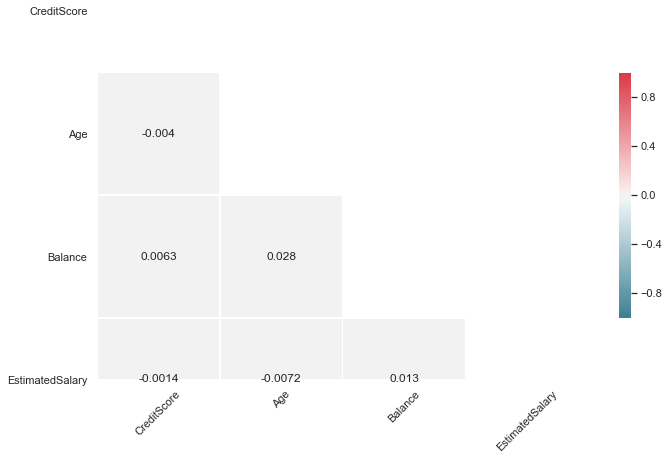

In [32]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Select columns containing continuous data
continuous_columns = df[['Exited', 'CreditScore', 'Age','Balance','EstimatedSalary']].columns

# Calculate correlation of all pairs of continuous features
corr = df[continuous_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

There seems to be no correlation between the continuous features, which is good because that means they are independent of each other. There is therefore no reason to create correlation plots for these features.

#### Correlation for the categorical features

C:\Users\Brynja\Anaconda3.1\lib\site-packages\pandas\core\series.py:628: FutureWarning: Categorical.ravel will return a Categorical object instead of an ndarray in a future version.
  return self._values.ravel(order=order)


(0, 100)

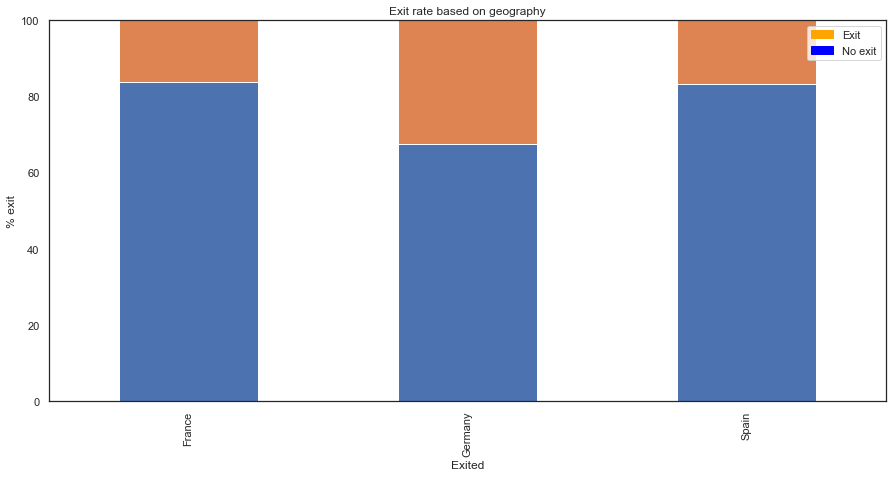

In [33]:
#Using code from the module lab
geography = pd.unique(df.Geography.ravel())

df['percent'] = 0

for i in geography:
    count = 1 / df[df.Geography == i].count()['Exited']
    index_list = df[df['Geography'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count * 100
        
group = df[['percent', 'Geography', 'Exited']].groupby(['Geography', 'Exited']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Exit rate based on geography", figsize=(15,7))

orange_patch = mpatches.Patch(color='orange', label='Exit')
blue_patch = mpatches.Patch(color='blue', label='No exit')
my_plot.legend(handles=[orange_patch, blue_patch], frameon = True)

my_plot.set_xlabel("Exited")
my_plot.set_ylabel("% exit")
my_plot.set_ylim([0,100])

(0, 100)

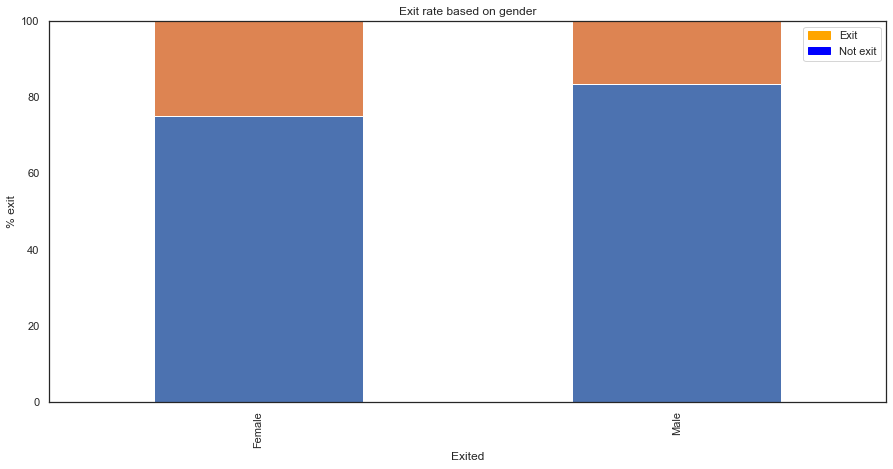

In [34]:
#Using code from the module lab
gender = pd.unique(df.Gender.ravel())

df['percent'] = 0

for i in gender:
    count = 1 / df[df.Gender == i].count()['Exited']
    index_list = df[df['Gender'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count * 100
        
group = df[['percent', 'Gender', 'Exited']].groupby(['Gender', 'Exited']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Exit rate based on gender", figsize=(15,7))

orange_patch = mpatches.Patch(color='orange', label='Exit')
blue_patch = mpatches.Patch(color='blue', label='Not exit')
my_plot.legend(handles=[orange_patch, blue_patch], frameon = True)

my_plot.set_xlabel("Exited")
my_plot.set_ylabel("% exit")
my_plot.set_ylim([0,100])

(0, 100)

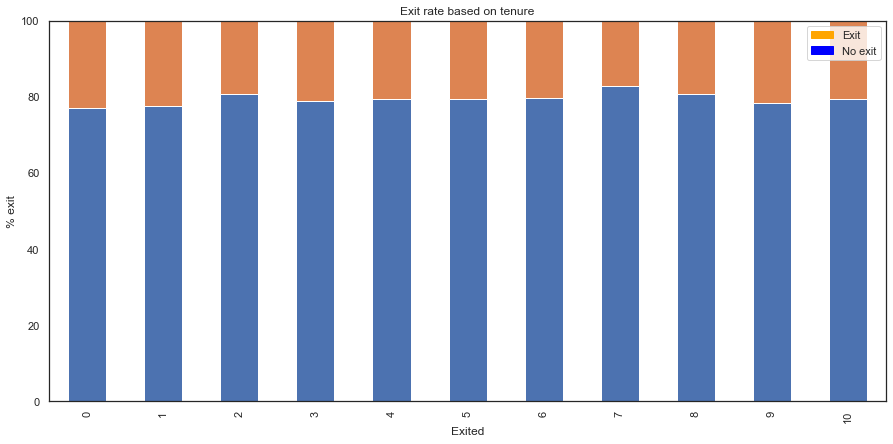

In [35]:
#Using code from the module lab
tenure = pd.unique(df.Tenure.ravel())

df['percent'] = 0

for i in tenure:
    count = 1 / df[df.Tenure == i].count()['Exited']
    index_list = df[df['Tenure'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count * 100
        
group = df[['percent', 'Tenure', 'Exited']].groupby(['Tenure', 'Exited']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Exit rate based on tenure", figsize=(15,7))

orange_patch = mpatches.Patch(color='orange', label='Exit')
blue_patch = mpatches.Patch(color='blue', label='No exit')
my_plot.legend(handles=[orange_patch, blue_patch], frameon = True)

my_plot.set_xlabel("Exited")
my_plot.set_ylabel("% exit")
my_plot.set_ylim([0,100])

(0, 100)

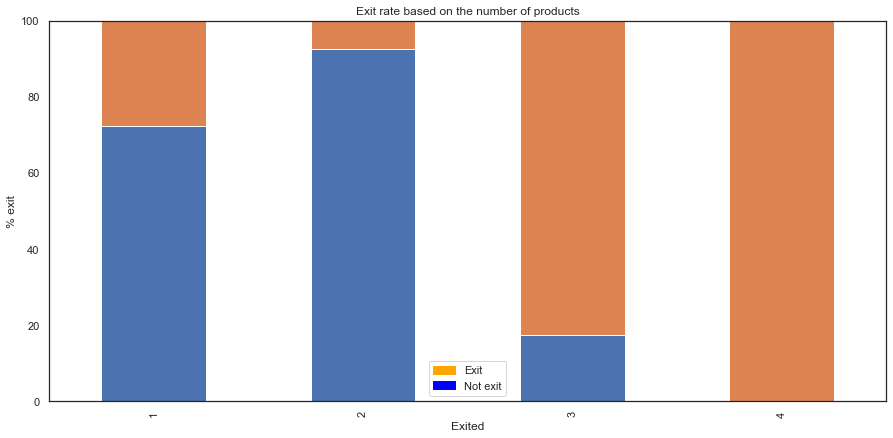

In [36]:
#Using code from the module lab
num_of_products = pd.unique(df.NumOfProducts.ravel())

df['percent'] = 0

for i in num_of_products:
    count = 1 / df[df.NumOfProducts == i].count()['Exited']
    index_list = df[df['NumOfProducts'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count * 100
        
group = df[['percent', 'NumOfProducts', 'Exited']].groupby(['NumOfProducts', 'Exited']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Exit rate based on the number of products", figsize=(15,7))

orange_patch = mpatches.Patch(color='orange', label='Exit')
blue_patch = mpatches.Patch(color='blue', label='Not exit')
my_plot.legend(handles=[orange_patch, blue_patch], frameon = True)

my_plot.set_xlabel("Exited")
my_plot.set_ylabel("% exit")
my_plot.set_ylim([0,100])

(0, 100)

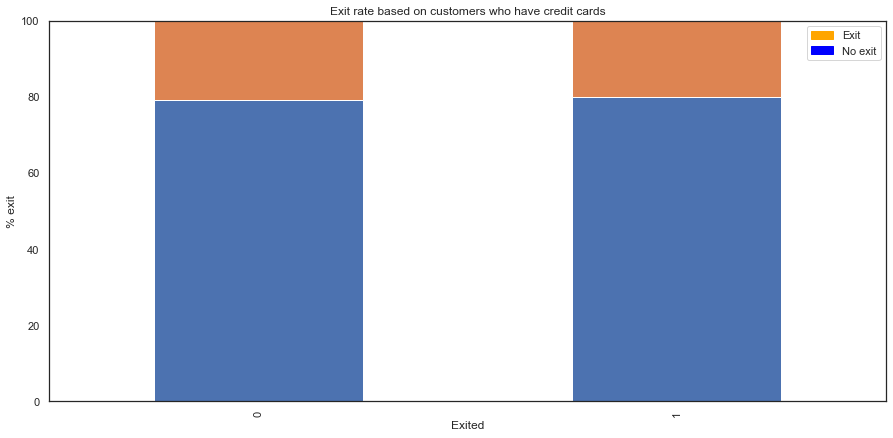

In [37]:
#Using code from the module lab
has_cr_card = pd.unique(df.HasCrCard.ravel())

df['percent'] = 0

for i in has_cr_card:
    count = 1 / df[df.HasCrCard == i].count()['Exited']
    index_list = df[df['HasCrCard'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count * 100
        
group = df[['percent', 'HasCrCard', 'Exited']].groupby(['HasCrCard', 'Exited']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Exit rate based on customers who have credit cards", figsize=(15,7))

orange_patch = mpatches.Patch(color='orange', label='Exit')
blue_patch = mpatches.Patch(color='blue', label='No exit')
my_plot.legend(handles=[orange_patch, blue_patch], frameon = True)

my_plot.set_xlabel("Exited")
my_plot.set_ylabel("% exit")
my_plot.set_ylim([0,100])

(0, 100)

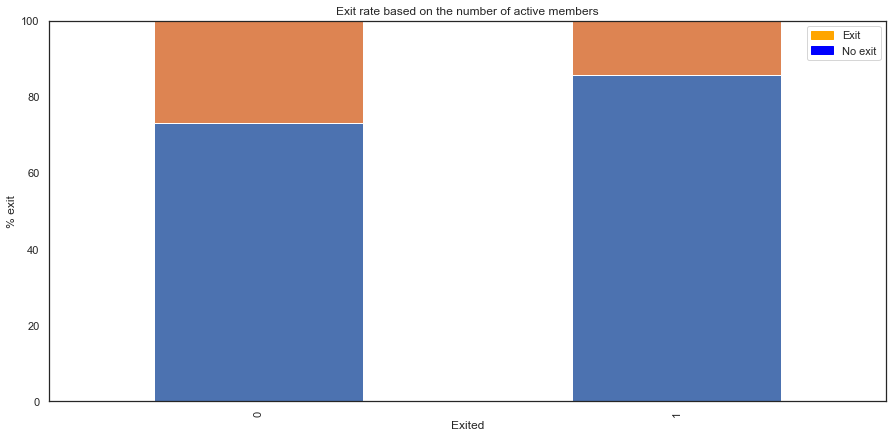

In [38]:
#Using code from the module lab
is_active_member = pd.unique(df.IsActiveMember.ravel())

df['percent'] = 0

for i in is_active_member:
    count = 1 / df[df.IsActiveMember == i].count()['Exited']
    index_list = df[df['IsActiveMember'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count * 100
        
group = df[['percent', 'IsActiveMember', 'Exited']].groupby(['IsActiveMember', 'Exited']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Exit rate based on the number of active members", figsize=(15,7))

orange_patch = mpatches.Patch(color='orange', label='Exit')
blue_patch = mpatches.Patch(color='blue', label='No exit')
my_plot.legend(handles=[orange_patch, blue_patch], frameon = True)

my_plot.set_xlabel("Exited")
my_plot.set_ylabel("% exit")
my_plot.set_ylim([0,100])

If we look at the categorical feature plot on *Exit rate based on geography* we can see that most customers that quit the bank are from Germany (about 35%). Customers from France and Spain have very similar exit percentage (about 15%) when it comes to quitting the bank.

If we look at the plot on *Exit rate based on gender* we can see that more female customers quit the bank (about 25%) than male customers (about 15%).

According to the *Exit rate based on tenure* plot the tenure does not seem to have an affect on the customers decicion to quit the bank (about 20% churn for every value).


In the *Exit rate based on the number of products* plot we can see a difference in the customer churn depending on the number of products. About 30% customers with one product have quit the bank and about 10% customers with two products have quit the bank. When it comes to customers with three or four products we see a big increase in the churn - about 80% of customers with three products quit the bank and about 100% of customers with four products quit the bank.

It seems that there is no difference in churning for customers who have credit cards and those who do not have credit cards.

If we look at the *Exit rate based on the active members* we can see that there are about 25% of non active customers that quit the bank and about 15% of active customers that quit the bank.

#### Continuous-categorical feature plots

<Figure size 432x288 with 0 Axes>

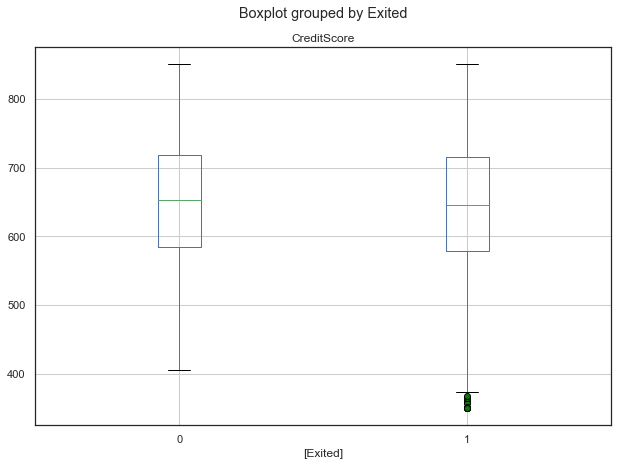

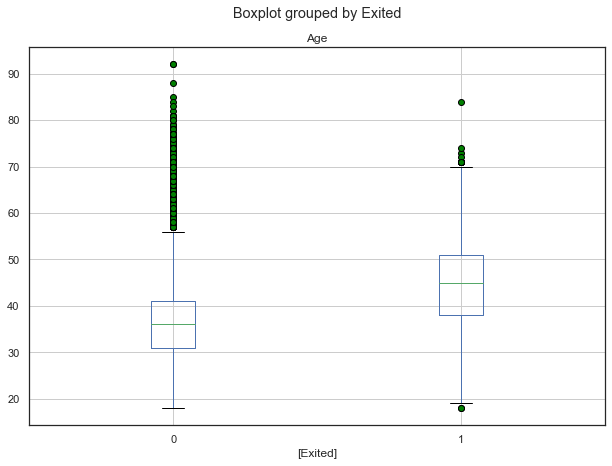

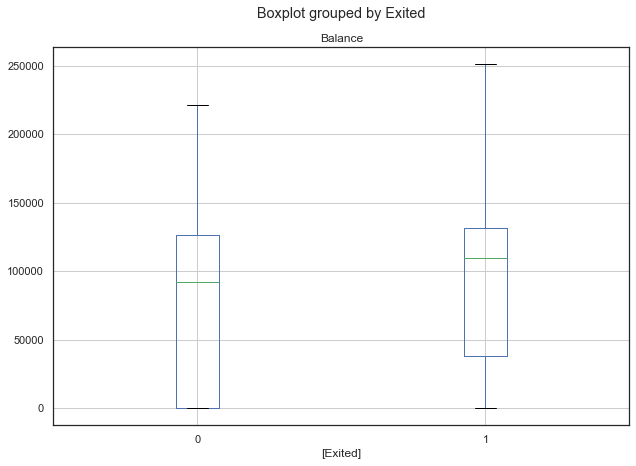

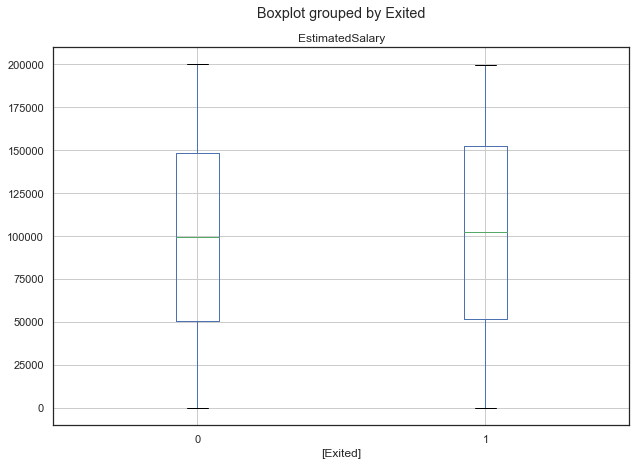

In [39]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['CreditScore'], by=['Exited'], flierprops=flierprops, figsize=(10,7))
df.boxplot(column=['Age'], by=['Exited'], flierprops=flierprops, figsize=(10,7))
df.boxplot(column=['Balance'], by=['Exited'], flierprops=flierprops, figsize=(10,7))
df.boxplot(column=['EstimatedSalary'], by=['Exited'], flierprops=flierprops, figsize=(10,7))

If we look at the continuous-categorical boxplot for customers *CreditScore*, we can see that customers credit score does not have a big affect on the customer churn.

In the boxplot for *Age* grouped by *Exited* there seems to be a lot of outliers. We can also see that the customers that exit the bank  are older than the ones that stay. Half of the customers that exit the bank are at the age range around 40-50 years old, while the half of the customers that stay are at the age range around 30-40 years old.

If we look at the boxplot for *Balance* grouped by *Exited* we can see that cumstomers balance does not have a big affect on the customers churn. If anything there seems that customers that quit the bank have a slightly higher balance.

In the boxplot for *EstimatedSalary* grouped by *Exited* we can see that customers estimated salary does not have a big affect on the customer churn.

In [40]:
df['Exited'].head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: category
Categories (2, int64): [0, 1]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021045F7AFC8>]],
      dtype=object)

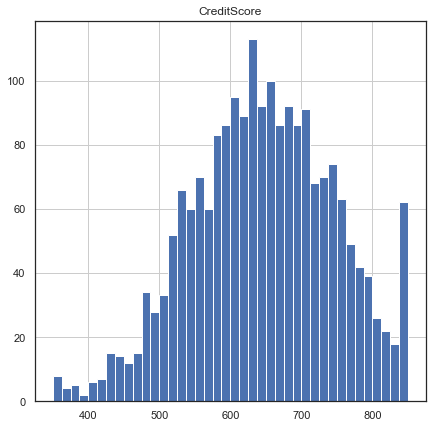

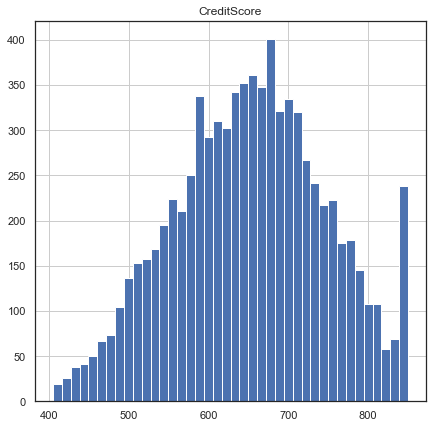

In [41]:
df[df['Exited'] == 1][['CreditScore']].hist(figsize=(7,7), bins=40)
df[df['Exited'] == 0][['CreditScore']].hist(figsize=(7,7), bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002104623A388>]],
      dtype=object)

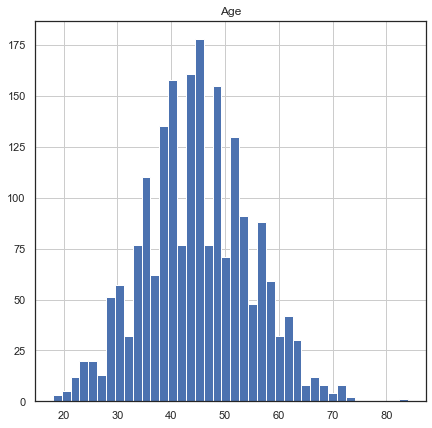

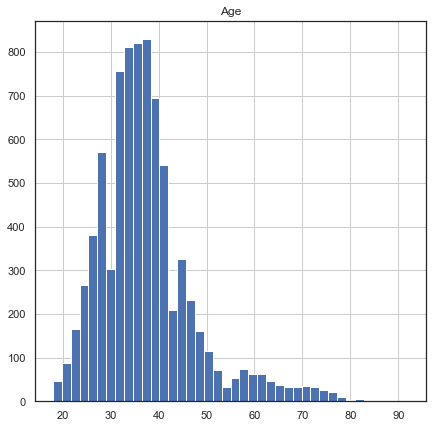

In [42]:
df[df['Exited'] == 1][['Age']].hist(figsize=(7,7), bins=40)
df[df['Exited'] == 0][['Age']].hist(figsize=(7,7), bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021047119588>]],
      dtype=object)

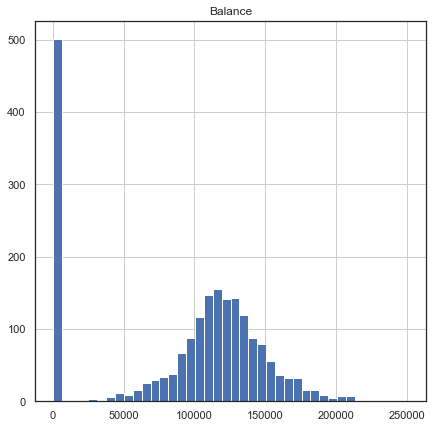

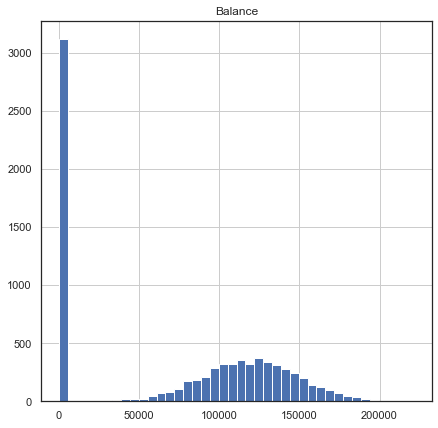

In [43]:
df[df['Exited'] == 1][['Balance']].hist(figsize=(7,7), bins=40)
df[df['Exited'] == 0][['Balance']].hist(figsize=(7,7), bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002104656F408>]],
      dtype=object)

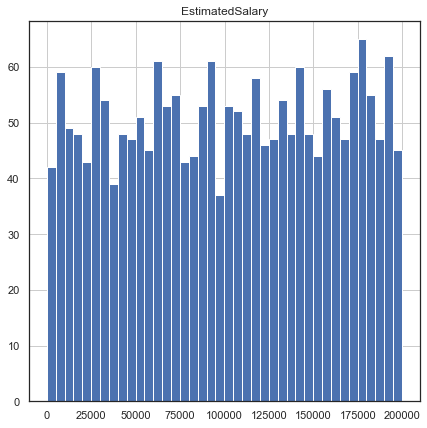

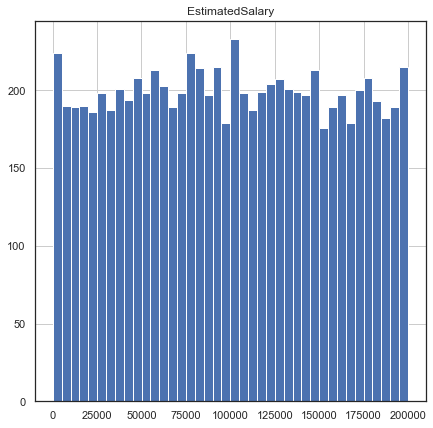

In [44]:
df[df['Exited'] == 1][['EstimatedSalary']].hist(figsize=(7,7), bins=40)
df[df['Exited'] == 0][['EstimatedSalary']].hist(figsize=(7,7), bins=40)

If we look at the continuous-categorical bar plots for *CreditScore*s effect on customer's exiting and not exiting the bank, we can see that there is not much difference between those two bar plots. We can therefore say that credit score does not affect the customer churn.

We can see the difference in the *Age* bar plots for customers that exit the bank and for those that don't. It is clear that those who exit the bank are older than the ones who do not.

There does not seem to ba any big difference in customer churning when looking at the bar plots for *Balance*.

The bar plots for *EstimatedSalary* show that the estimated salaries are evenly distributed between customers who churn and the customers who stay.

# Logistic Regression


I decided to see if I could create a logistic regression model for the dataset to see the effect each feature has on customer churn. 
I started by creating dummy variables for the categorical features, Geography and Gender, since logistic regression requires numerical values.

In [59]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, dtype=int)
encoder.fit(df[['Geography', 'Gender']])
hotEncodedFeatureNames = encoder.get_feature_names().tolist()
oneHotEncoded = encoder.transform(df[['Geography', 'Gender']])
encodedData = pd.DataFrame(data=oneHotEncoded, columns=hotEncodedFeatureNames)
encodedDf = pd.concat([df, encodedData], axis = 1).drop(['Geography', 'Gender', 'RowNumber', 'percent'], axis = 1)

In [82]:
#Fit a logistic regression model to inspect each feature effect
import statsmodels.api as sm
logit_model=sm.Logit(target.astype(float),encodedDf.drop(column, axis=1).astype(float))
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.428068
         Iterations 7
                                Results: Logit
Model:                   Logit                 Pseudo R-squared:      0.153    
Dependent Variable:      Exited                AIC:                   8585.3554
Date:                    2019-12-04 21:43      BIC:                   8671.8795
No. Observations:        10000                 Log-Likelihood:        -4280.7  
Df Model:                11                    LL-Null:               -5054.9  
Df Residuals:            9988                  LLR p-value:           0.0000   
Converged:               1.0000                Scale:                 1.0000   
No. Iterations:          7.0000                                                
-------------------------------------------------------------------------------
                 Coef.    Std.Err.      z     P>|z|      [0.025       0.975]   
---------------------------------------------------

The coefficients informs us about the effect of each feature on customer churn, note that  P values are lower than 0.05 for some values which denotes insignificance. We cans see that the feature x1_Female is lower than x1_Male, which tells us that females are more likely to churn. We can see that customer from Germany are more likely to churn than customers from France and Spain. There is small difference between customers in France and Spain churning whith Spanish customers slighly more likely to churn. Customers that have credid cards are a little less likely to churn than those that do not have one. Customers that have been with the bank for longer are slightly less likely to churn(Tenure). The coefficients for CreditScore, Age, IsActiveMember and Balance were insignificant with P value less than 0.05, which means that we cannot use those when interpreting the logistic regression model.